In [1]:
import pandas as pd
import sys
import time

In [3]:
def transform(name):
    FOO = []
    pair = pd.read_csv('ORIGINAL 5M/'+name+'.csv')
    try:
        pair = pair.drop(['Unnamed: 0'],axis=1)
    except:
        pass
    for foo in range(0,len(pair)):
        FOO.append(pair.iloc[foo]['Local time'][:19])
    pair['Local time'] = FOO
    pair['Local time'] = pd.to_datetime(pair['Local time'],format='%d.%m.%Y %H:%M:%S')
    pair = pair[(pair['Local time']>='28.02.2017 00:00:00')&(pair['Local time']<='27.02.2020 23:55:00')]
    
    if name == 'USDCHF' or name == 'USDJPY':
        pair['Open'] = 1 / pair['Open']
        pair['High'] = 1 / pair['High']
        pair['Low'] = 1 / pair['Low']
        pair['Close'] = 1 / pair['Close']
                                 
    pair.to_csv('TRANSFORMED 5M/'+name+'.csv')
    print('Effectué pour la base '+name)
    print(pair.shape)
    print(pair)
    return()
NAME = ['EURUSD','AUDUSD','GBPUSD','USDCHF','USDJPY']
for name in NAME:
    transform(name)
print('Fin de la transformation des bases.')

Effectué pour la base EURUSD
(225504, 6)
                Local time     Open     High      Low    Close  Volume
0      2017-02-28 00:00:00  1.05872  1.05875  1.05853  1.05853  274.23
1      2017-02-28 00:05:00  1.05853  1.05870  1.05850  1.05864  239.86
2      2017-02-28 00:10:00  1.05865  1.05872  1.05862  1.05867  166.08
3      2017-02-28 00:15:00  1.05867  1.05867  1.05853  1.05863  159.67
4      2017-02-28 00:20:00  1.05862  1.05864  1.05841  1.05843  176.65
...                    ...      ...      ...      ...      ...     ...
225499 2020-02-27 23:35:00  1.10025  1.10033  1.10021  1.10023   91.69
225500 2020-02-27 23:40:00  1.10025  1.10033  1.10023  1.10030  121.03
225501 2020-02-27 23:45:00  1.10030  1.10036  1.10026  1.10035   95.32
225502 2020-02-27 23:50:00  1.10035  1.10039  1.10025  1.10029   97.89
225503 2020-02-27 23:55:00  1.10028  1.10029  1.10022  1.10026  177.88

[225504 rows x 6 columns]
Effectué pour la base AUDUSD
(225504, 6)
                Local time     Open    

In [6]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

/opt/anaconda3/envs/FinTech/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


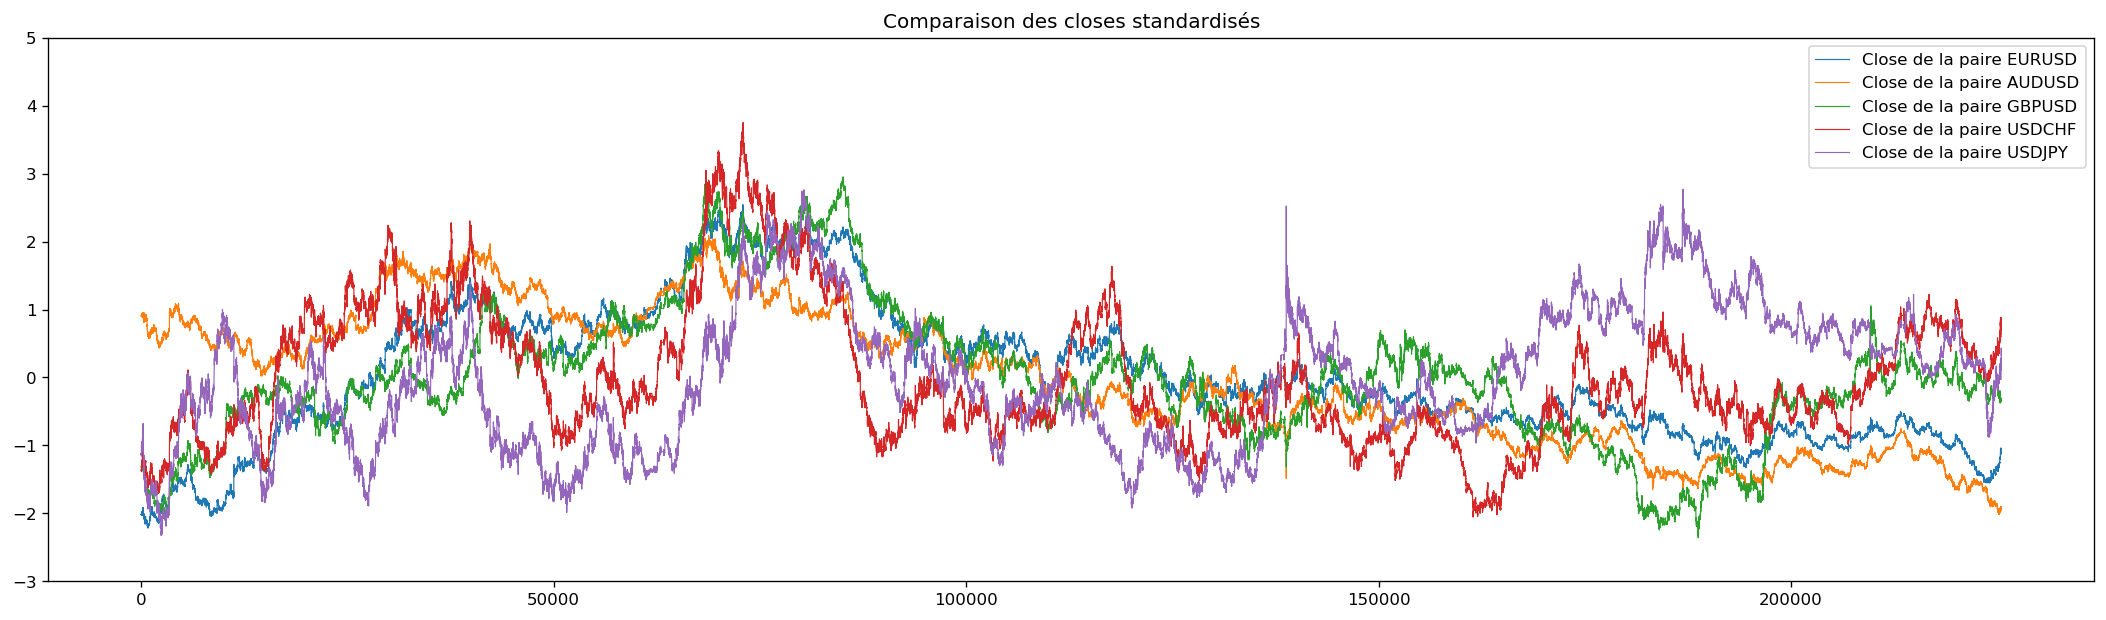

In [11]:
plt.figure(figsize=(22,6),dpi=120)
plt.ylim(-3, 5)
plt.title(label='Comparaison des closes standardisés')
for name in NAME:
    pair = pd.read_csv('TRANSFORMED 5M/'+name+'.csv',)
    plt.plot(preprocessing.scale(pair['Close']),label='Close de la paire '+name,lw=0.7)
plt.legend()